In [15]:
import json
import pandas as pd

# Function to process a JSONL file and save it to an Excel file
def process_jsonl_to_excel(jsonl_path, output_excel_path):
    # Load JSONL file into a DataFrame
    df = pd.read_json(jsonl_path, lines=True)

    # Expand 'ball_data' column
    ball_data_expanded = pd.json_normalize(df['ball_data']).add_prefix('ball_data.')

    # Expand 'possession' column
    possession_expanded = pd.json_normalize(df['possession']).add_prefix('possession.')

    # Expand 'image_corners_projection' column
    image_corners_expanded = pd.json_normalize(df['image_corners_projection']).add_prefix('image_corners_projection.')

    # Combine the expanded columns with the original DataFrame
    df_expanded = pd.concat([df.drop(columns=['ball_data', 'possession', 'image_corners_projection']),
                             ball_data_expanded,
                             possession_expanded,
                             image_corners_expanded], axis=1)

    # Display the expanded DataFrame
    print(f"Expanded DataFrame for {jsonl_path}:")
    print(df_expanded)

    # Save the expanded DataFrame to an Excel file
    df_expanded.to_excel(output_excel_path, index=False)
    print(f"Expanded DataFrame saved to {output_excel_path}")

# Function to process a JSON file and save it to an Excel file
def process_json_to_excel(json_path, output_excel_path):
    # Load JSON file into a Python object
    with open(json_path, 'r') as file:
        data = json.load(file)  # Load JSON data

    # Ensure the data is a list of dictionaries
    if isinstance(data, dict):
        data = [data]  # Convert single dictionary to a list of one dictionary

    # Normalize the JSON data to ensure consistent lengths
    normalized_data = []
    for entry in data:
        # Ensure each entry is a dictionary
        if isinstance(entry, dict):
            normalized_entry = {
                "frame": entry.get("frame"),
                "timestamp": entry.get("timestamp"),
                "period": entry.get("period"),
                "ball_data": entry.get("ball_data", {}),  # Default to empty dict if missing
                "possession": entry.get("possession", {}),  # Default to empty dict if missing
                "image_corners_projection": entry.get("image_corners_projection", {})  # Default to empty dict if missing
            }
            normalized_data.append(normalized_entry)
        else:
            print(f"Skipping invalid entry: {entry}")  # Skip non-dictionary entries

    # Convert normalized data to DataFrame
    df = pd.DataFrame(normalized_data)

    # Display the DataFrame
    print(f"DataFrame for {json_path}:")
    print(df)

    # Expand 'ball_data' column (if it exists)
    if 'ball_data' in df.columns:
        ball_data_expanded = pd.json_normalize(df['ball_data']).add_prefix('ball_data.')
    else:
        ball_data_expanded = pd.DataFrame()

    # Expand 'possession' column (if it exists)
    if 'possession' in df.columns:
        possession_expanded = pd.json_normalize(df['possession']).add_prefix('possession.')
    else:
        possession_expanded = pd.DataFrame()

    # Expand 'image_corners_projection' column (if it exists)
    if 'image_corners_projection' in df.columns:
        image_corners_expanded = pd.json_normalize(df['image_corners_projection']).add_prefix('image_corners_projection.')
    else:
        image_corners_expanded = pd.DataFrame()

    # Combine the expanded columns with the original DataFrame
    columns_to_drop = [col for col in ['ball_data', 'possession', 'image_corners_projection'] if col in df.columns]
    df_expanded = pd.concat([df.drop(columns=columns_to_drop),
                             ball_data_expanded,
                             possession_expanded,
                             image_corners_expanded], axis=1)

    # Display the expanded DataFrame
    print(f"Expanded DataFrame for {json_path}:")
    print(df_expanded)

    # Save the expanded DataFrame to an Excel file
    df_expanded.to_excel(output_excel_path, index=False)
    print(f"Expanded DataFrame saved to {output_excel_path}")

# Process the first JSONL file
jsonl_path_1 = '/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated.jsonl'
output_excel_path_1 = '/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx'
process_jsonl_to_excel(jsonl_path_1, output_excel_path_1)

# Process the second JSON file
json_path_2 = '/Users/marclambertes/Downloads/Wyscout/2007796_match.json'  # Replace with the actual path
output_excel_path_2 = '/Users/marclambertes/Downloads/Wyscout/second_file_expanded.xlsx'  # Replace with the desired output path
process_json_to_excel(json_path_2, output_excel_path_2)

DataFrame for /Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated.jsonl:
       frame               timestamp  period  \
0          0                     NaT     NaN   
1          1                     NaT     NaN   
2          2                     NaT     NaN   
3          3                     NaT     NaN   
4          4                     NaT     NaN   
...      ...                     ...     ...   
54975  54975 2025-03-17 01:31:09.500     2.0   
54976  54976 2025-03-17 01:31:09.600     2.0   
54977  54977 2025-03-17 01:31:09.700     2.0   
54978  54978 2025-03-17 01:31:09.800     2.0   
54979  54979 2025-03-17 01:31:09.900     2.0   

                                               ball_data  \
0      {'x': None, 'y': None, 'z': None, 'is_detected...   
1      {'x': None, 'y': None, 'z': None, 'is_detected...   
2      {'x': None, 'y': None, 'z': None, 'is_detected...   
3      {'x': None, 'y': None, 'z': None, 'is_detected...   
4      {'x': None, 'y': None, 'z'

Expanded DataFrame saved to /Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx
DataFrame for /Users/marclambertes/Downloads/Wyscout/2007796_match.json:
  frame timestamp period ball_data possession image_corners_projection
0  None      None   None        {}         {}                       {}
Expanded DataFrame for /Users/marclambertes/Downloads/Wyscout/2007796_match.json:
  frame timestamp period
0  None      None   None
Expanded DataFrame saved to /Users/marclambertes/Downloads/Wyscout/second_file_expanded.xlsx


In [21]:
import json
import pandas as pd

# Load a JSON file
file_path = '/Users/marclambertes/Downloads/Wyscout/2007796_match.json'

with open(file_path, 'r') as file:
    data = json.load(file)

# Convert JSON data to DataFrame
# If the JSON data is a list of dictionaries, it can be directly converted to a DataFrame
if isinstance(data, list):
    df = pd.DataFrame(data)
elif isinstance(data, dict):
    # If the JSON data is a single dictionary, convert it to a DataFrame with one row
    df = pd.DataFrame([data])
else:
    raise ValueError("JSON data must be a list of dictionaries or a single dictionary.")

# Save the DataFrame to an Excel file
output_excel_path = '/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx'
df.to_excel(output_excel_path, index=False)

print(f"\nDataFrame saved to {output_excel_path}")


DataFrame saved to /Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx


Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')


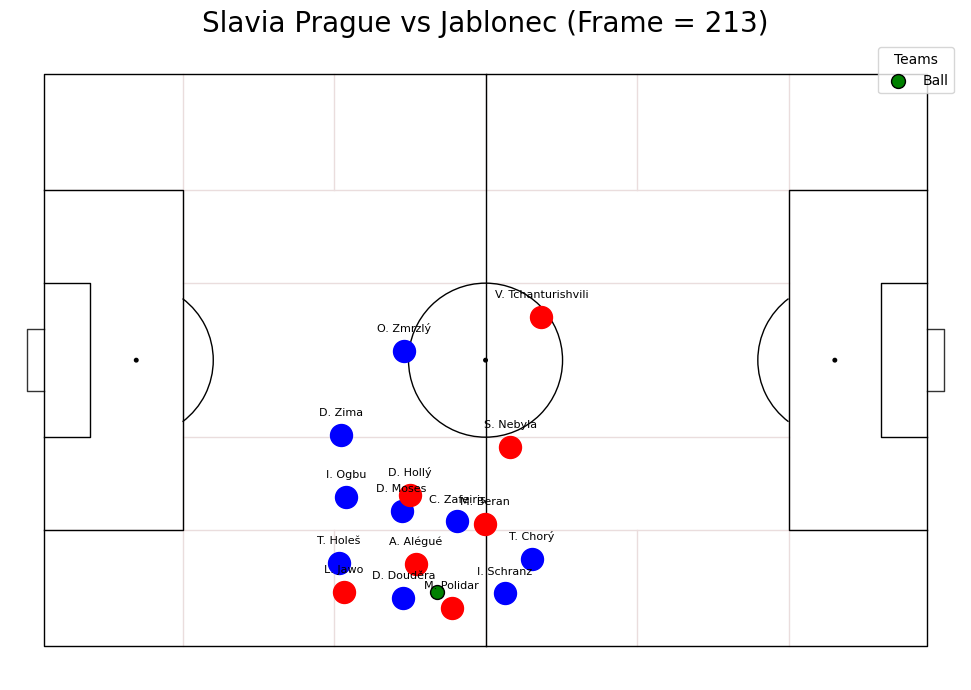

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import matplotlib.colors as mcolors

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_short_name = {}  # Dictionary to map player_id to short_name
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and short names
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to short_name
            player_to_short_name[player_id] = short_name
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name}")  # Format: "Number. Short Name"

# Filter the first DataFrame for frame = 213
frame_data = df_tracking[df_tracking["frame"] == 213]

# Extract and parse player_data
player_data_str = frame_data["player_data"].iloc[0]

# Check if player_data is a string and needs parsing
if isinstance(player_data_str, str):
    try:
        # Try parsing as JSON (if properly formatted)
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        # If JSON parsing fails, try using ast.literal_eval (for Python literals)
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    # If player_data is already a list of dictionaries, use it directly
    player_data = player_data_str

# Extract ball data
ball_x = frame_data["ball_data.x"].iloc[0]
ball_y = frame_data["ball_data.y"].iloc[0]
ball_z = frame_data["ball_data.z"].iloc[0]
ball_is_detected = frame_data["ball_data.is_detected"].iloc[0]

# Extract player positions, IDs, and team IDs
player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_is_detected = [player['is_detected'] for player in player_data]

# Map player IDs to team IDs using the player_to_team dictionary
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]

# Map player IDs to short names using the player_to_short_name dictionary
player_short_names = [player_to_short_name.get(player_id, "Unknown") for player_id in player_ids]

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions (only if detected)
for i, (x, y, player_id, team_id, is_detected, short_name) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_is_detected, player_short_names)):
    if is_detected:  # Only plot detected players
        color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
        ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
        
        # Display short_name outside the dot with black text
        ax.text(x, y + 2, short_name, fontsize=8, ha='center', va='bottom', color='black')  # Adjust y + 2 for positioning

# Plot ball position (only if detected)
if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=100, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Frame = 213)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')


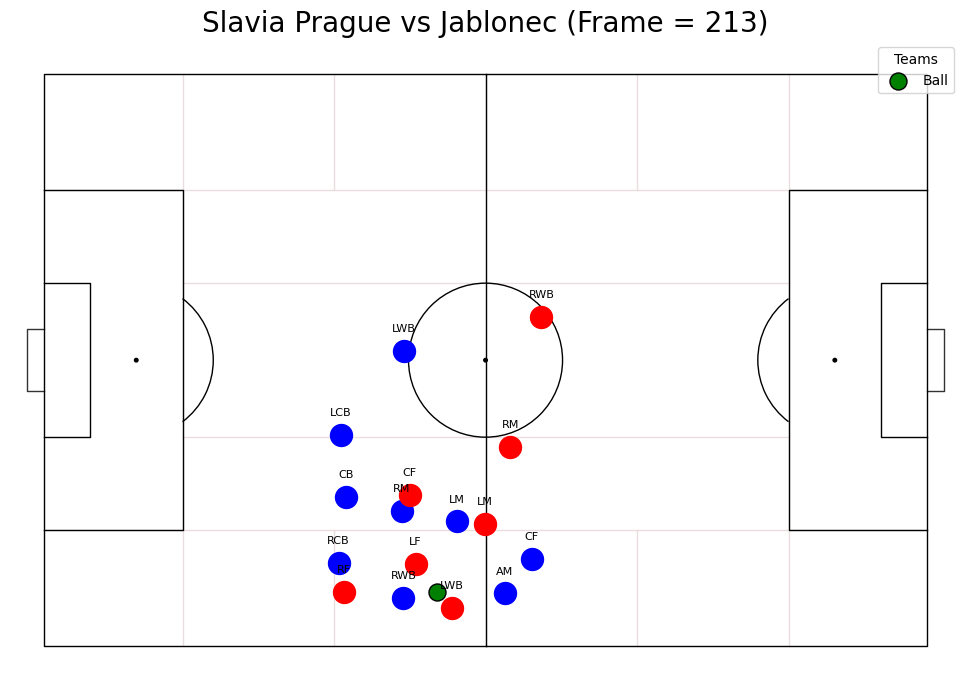

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import matplotlib.colors as mcolors

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_acronym = {}  # Dictionary to map player_id to acronym
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and acronyms
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            acronym = player['player_role']['acronym']  # Get the acronym from player_role
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to acronym
            player_to_acronym[player_id] = acronym
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name} ({acronym})")  # Format: "Number. Short Name (Acronym)"

# Filter the first DataFrame for frame = 213
frame_data = df_tracking[df_tracking["frame"] == 213]

# Extract and parse player_data
player_data_str = frame_data["player_data"].iloc[0]

# Check if player_data is a string and needs parsing
if isinstance(player_data_str, str):
    try:
        # Try parsing as JSON (if properly formatted)
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        # If JSON parsing fails, try using ast.literal_eval (for Python literals)
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    # If player_data is already a list of dictionaries, use it directly
    player_data = player_data_str

# Extract ball data
ball_x = frame_data["ball_data.x"].iloc[0]
ball_y = frame_data["ball_data.y"].iloc[0]
ball_z = frame_data["ball_data.z"].iloc[0]
ball_is_detected = frame_data["ball_data.is_detected"].iloc[0]

# Extract player positions, IDs, and team IDs
player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_is_detected = [player['is_detected'] for player in player_data]

# Map player IDs to team IDs using the player_to_team dictionary
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]

# Map player IDs to acronyms using the player_to_acronym dictionary
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions (only if detected)
for i, (x, y, player_id, team_id, is_detected, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_is_detected, player_acronyms)):
    if is_detected:  # Only plot detected players
        color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
        ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
        
        # Display acronym outside the dot with black text
        ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Adjust y + 2 for positioning

# Plot ball position (only if detected)
if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Frame = 213)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')


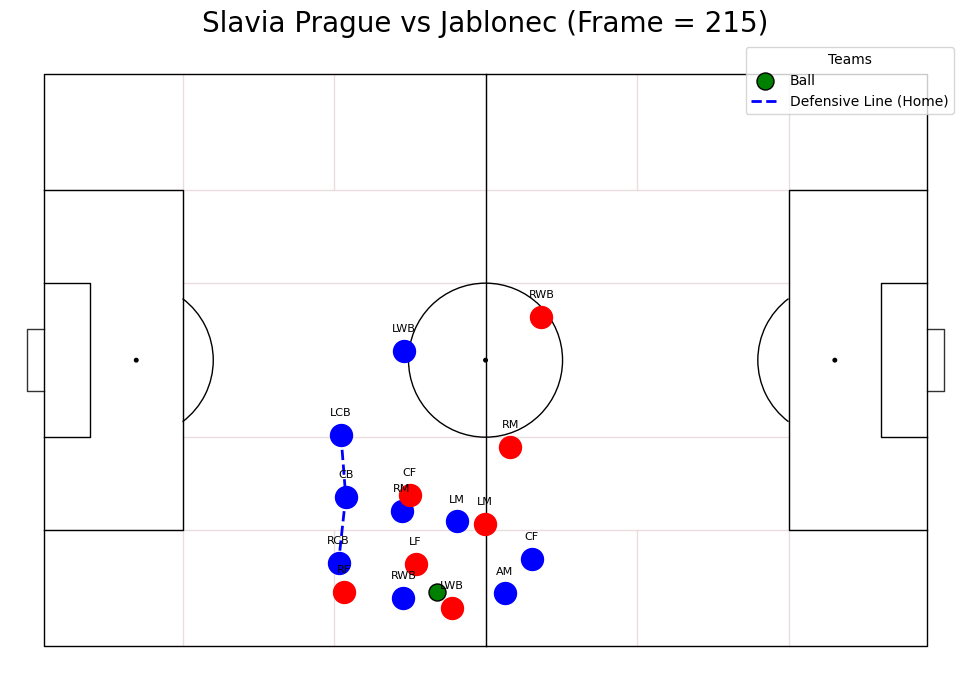

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import matplotlib.colors as mcolors

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_acronym = {}  # Dictionary to map player_id to acronym
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and acronyms
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            acronym = player['player_role']['acronym']  # Get the acronym from player_role
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to acronym
            player_to_acronym[player_id] = acronym
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name} ({acronym})")  # Format: "Number. Short Name (Acronym)"

# Filter the first DataFrame for frame = 213
frame_data = df_tracking[df_tracking["frame"] == 213]

# Extract and parse player_data
player_data_str = frame_data["player_data"].iloc[0]

# Check if player_data is a string and needs parsing
if isinstance(player_data_str, str):
    try:
        # Try parsing as JSON (if properly formatted)
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        # If JSON parsing fails, try using ast.literal_eval (for Python literals)
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    # If player_data is already a list of dictionaries, use it directly
    player_data = player_data_str

# Extract ball data
ball_x = frame_data["ball_data.x"].iloc[0]
ball_y = frame_data["ball_data.y"].iloc[0]
ball_z = frame_data["ball_data.z"].iloc[0]
ball_is_detected = frame_data["ball_data.is_detected"].iloc[0]

# Extract player positions, IDs, and team IDs
player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_is_detected = [player['is_detected'] for player in player_data]

# Map player IDs to team IDs using the player_to_team dictionary
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]

# Map player IDs to acronyms using the player_to_acronym dictionary
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions (only if detected)
for i, (x, y, player_id, team_id, is_detected, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_is_detected, player_acronyms)):
    if is_detected:  # Only plot detected players
        color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
        ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
        
        # Display acronym outside the dot with black text
        ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Adjust y + 2 for positioning

# Plot ball position (only if detected)
if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Calculate average positions for LCB, CB, and RCB of the home_team
home_team_defenders = {
    'LCB': {'x': [], 'y': []},
    'CB': {'x': [], 'y': []},
    'RCB': {'x': [], 'y': []}
}

for x, y, team_id, acronym in zip(player_x, player_y, player_teams, player_acronyms):
    if team_id == home_team_id and acronym in home_team_defenders:
        home_team_defenders[acronym]['x'].append(x)
        home_team_defenders[acronym]['y'].append(y)

# Calculate average positions
average_positions = {}
for acronym, positions in home_team_defenders.items():
    if positions['x']:  # Check if there are positions for this acronym
        avg_x = sum(positions['x']) / len(positions['x'])
        avg_y = sum(positions['y']) / len(positions['y'])
        average_positions[acronym] = (avg_x, avg_y)

# Draw lines connecting LCB, CB, and RCB
if len(average_positions) == 3:  # Ensure all three acronyms are present
    lcb_x, lcb_y = average_positions['LCB']
    cb_x, cb_y = average_positions['CB']
    rcb_x, rcb_y = average_positions['RCB']
    
    # Draw lines
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='blue', linestyle='--', linewidth=2, label='Defensive Line (Home)')
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='blue', linestyle='--', linewidth=2)

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Frame = 215)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')


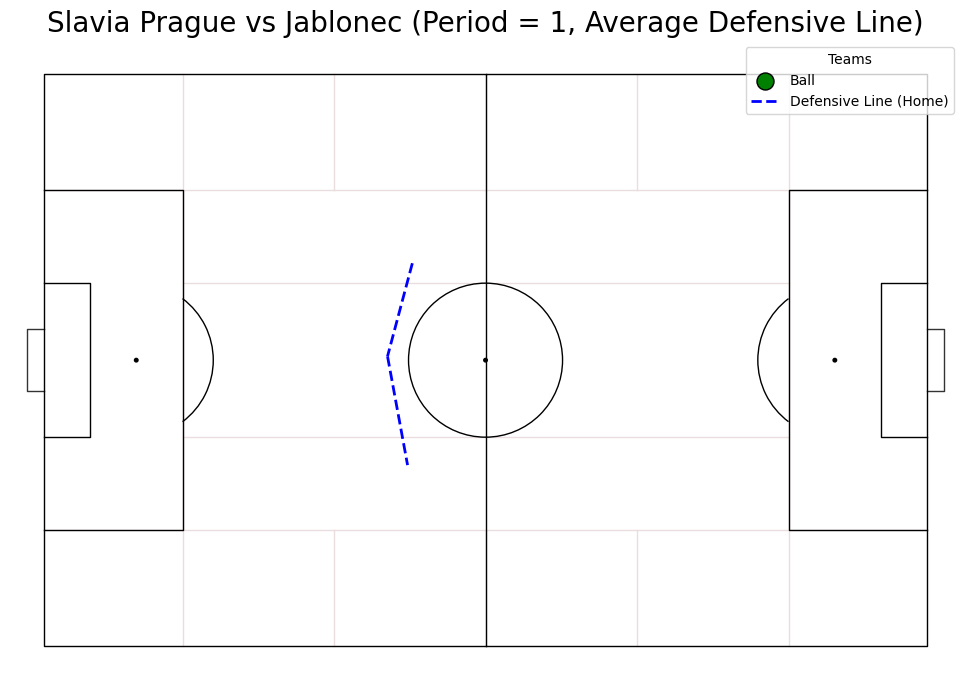

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import matplotlib.colors as mcolors

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_acronym = {}  # Dictionary to map player_id to acronym
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and acronyms
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            acronym = player['player_role']['acronym']  # Get the acronym from player_role
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to acronym
            player_to_acronym[player_id] = acronym
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name} ({acronym})")  # Format: "Number. Short Name (Acronym)"

# Filter the first DataFrame for period == 1
period_data = df_tracking[df_tracking["period"] == 1]

# Initialize dictionaries to store positions for LCB, CB, and RCB
home_team_defenders = {
    'LCB': {'x': [], 'y': []},
    'CB': {'x': [], 'y': []},
    'RCB': {'x': [], 'y': []}
}

# Iterate through all frames in period == 1
for frame in period_data["frame"].unique():
    frame_data = period_data[period_data["frame"] == frame]
    
    # Extract and parse player_data
    player_data_str = frame_data["player_data"].iloc[0]
    
    if isinstance(player_data_str, str):
        try:
            player_data = json.loads(player_data_str)
        except json.JSONDecodeError:
            try:
                player_data = ast.literal_eval(player_data_str)
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse player_data for frame {frame}: {e}")
                continue
    else:
        player_data = player_data_str
    
    # Extract player positions, IDs, and team IDs
    player_x = [player['x'] for player in player_data]
    player_y = [player['y'] for player in player_data]
    player_ids = [player['player_id'] for player in player_data]
    player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
    player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]
    
    # Collect positions for LCB, CB, and RCB of the home_team
    for x, y, team_id, acronym in zip(player_x, player_y, player_teams, player_acronyms):
        if team_id == home_team_id and acronym in home_team_defenders:
            home_team_defenders[acronym]['x'].append(x)
            home_team_defenders[acronym]['y'].append(y)

# Calculate average positions
average_positions = {}
for acronym, positions in home_team_defenders.items():
    if positions['x']:  # Check if there are positions for this acronym
        avg_x = sum(positions['x']) / len(positions['x'])
        avg_y = sum(positions['y']) / len(positions['y'])
        average_positions[acronym] = (avg_x, avg_y)

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions for the last frame in period == 1 (for visualization)
last_frame_data = period_data[period_data["frame"] == period_data["frame"].max()]
player_data_str = last_frame_data["player_data"].iloc[0]

if isinstance(player_data_str, str):
    try:
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    player_data = player_data_str

player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

for i, (x, y, player_id, team_id, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_acronyms)):
    color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
    ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
    ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Display acronym outside the dot

# Plot ball position for the last frame
ball_x = last_frame_data["ball_data.x"].iloc[0]
ball_y = last_frame_data["ball_data.y"].iloc[0]
ball_is_detected = last_frame_data["ball_data.is_detected"].iloc[0]

if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Draw lines connecting LCB, CB, and RCB based on average positions
if len(average_positions) == 3:  # Ensure all three acronyms are present
    lcb_x, lcb_y = average_positions['LCB']
    cb_x, cb_y = average_positions['CB']
    rcb_x, rcb_y = average_positions['RCB']
    
    # Draw lines
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='blue', linestyle='--', linewidth=2, label='Defensive Line (Home)')
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='blue', linestyle='--', linewidth=2)

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Period = 1, Average Defensive Line)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')


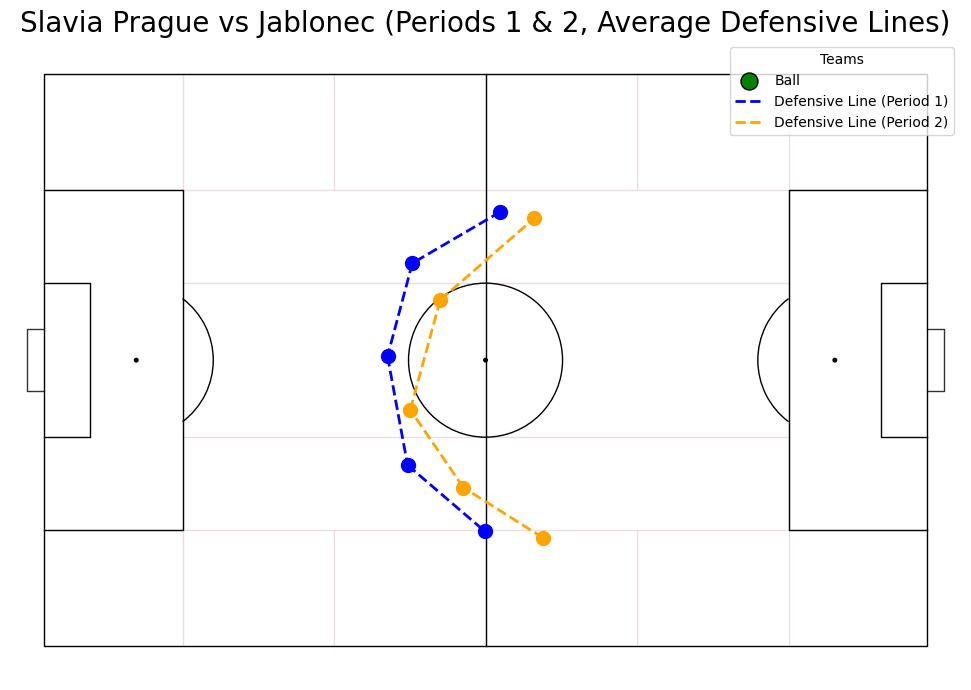

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import matplotlib.colors as mcolors

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_acronym = {}  # Dictionary to map player_id to acronym
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and acronyms
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            acronym = player['player_role']['acronym']  # Get the acronym from player_role
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to acronym
            player_to_acronym[player_id] = acronym
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name} ({acronym})")  # Format: "Number. Short Name (Acronym)"

# Function to calculate average positions for a given period
def calculate_average_positions(period_data, home_team_id, player_to_acronym):
    home_team_defenders = {
        'LWB': {'x': [], 'y': []},
        'LCB': {'x': [], 'y': []},
        'CB': {'x': [], 'y': []},
        'RCB': {'x': [], 'y': []},
        'RWB': {'x': [], 'y': []}
    }
    
    for frame in period_data["frame"].unique():
        frame_data = period_data[period_data["frame"] == frame]
        
        # Extract and parse player_data
        player_data_str = frame_data["player_data"].iloc[0]
        
        if isinstance(player_data_str, str):
            try:
                player_data = json.loads(player_data_str)
            except json.JSONDecodeError:
                try:
                    player_data = ast.literal_eval(player_data_str)
                except (ValueError, SyntaxError) as e:
                    print(f"Failed to parse player_data for frame {frame}: {e}")
                    continue
        else:
            player_data = player_data_str
        
        # Extract player positions, IDs, and team IDs
        player_x = [player['x'] for player in player_data]
        player_y = [player['y'] for player in player_data]
        player_ids = [player['player_id'] for player in player_data]
        player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
        player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]
        
        # Collect positions for LWB, LCB, CB, RCB, and RWB of the home_team
        for x, y, team_id, acronym in zip(player_x, player_y, player_teams, player_acronyms):
            if team_id == home_team_id and acronym in home_team_defenders:
                home_team_defenders[acronym]['x'].append(x)
                home_team_defenders[acronym]['y'].append(y)
    
    # Calculate average positions
    average_positions = {}
    for acronym, positions in home_team_defenders.items():
        if positions['x']:  # Check if there are positions for this acronym
            avg_x = sum(positions['x']) / len(positions['x'])
            avg_y = sum(positions['y']) / len(positions['y'])
            average_positions[acronym] = (avg_x, avg_y)
    
    return average_positions

# Function to flip coordinates to ensure both periods face the same side
def flip_coordinates(average_positions, pitch_length=105):
    flipped_positions = {}
    for acronym, (x, y) in average_positions.items():
        # Flip x-coordinate relative to the center (0, 0)
        flipped_x = -x  # Subtract from 0 to flip
        flipped_positions[acronym] = (flipped_x, y)  # Keep y-coordinate the same
    return flipped_positions

# Filter the first DataFrame for period == 1 and period == 2
period1_data = df_tracking[df_tracking["period"] == 1]
period2_data = df_tracking[df_tracking["period"] == 2]

# Calculate average positions for period == 1 and period == 2
average_positions_period1 = calculate_average_positions(period1_data, home_team_id, player_to_acronym)
average_positions_period2 = calculate_average_positions(period2_data, home_team_id, player_to_acronym)

# Flip coordinates for period == 2 to ensure both periods face the same side
average_positions_period2 = flip_coordinates(average_positions_period2)

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions for the last frame in period == 2 (for visualization)
last_frame_data = period2_data[period2_data["frame"] == period2_data["frame"].max()]
player_data_str = last_frame_data["player_data"].iloc[0]

if isinstance(player_data_str, str):
    try:
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    player_data = player_data_str

player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

for i, (x, y, player_id, team_id, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_acronyms)):
    color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
    ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
    ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Display acronym outside the dot

# Plot ball position for the last frame
ball_x = last_frame_data["ball_data.x"].iloc[0]
ball_y = last_frame_data["ball_data.y"].iloc[0]
ball_is_detected = last_frame_data["ball_data.is_detected"].iloc[0]

if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Draw lines and nodes for period == 1
if len(average_positions_period1) == 5:  # Ensure all five acronyms are present
    lwb_x, lwb_y = average_positions_period1['LWB']
    lcb_x, lcb_y = average_positions_period1['LCB']
    cb_x, cb_y = average_positions_period1['CB']
    rcb_x, rcb_y = average_positions_period1['RCB']
    rwb_x, rwb_y = average_positions_period1['RWB']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='blue', linestyle='--', linewidth=2, label='Defensive Line (Period 1)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='blue', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x], [lwb_y, lcb_y, cb_y, rcb_y, rwb_y], color='blue', s=100, marker='o')

# Draw lines and nodes for period == 2
if len(average_positions_period2) == 5:  # Ensure all five acronyms are present
    lwb_x, lwb_y = average_positions_period2['LWB']
    lcb_x, lcb_y = average_positions_period2['LCB']
    cb_x, cb_y = average_positions_period2['CB']
    rcb_x, rcb_y = average_positions_period2['RCB']
    rwb_x, rwb_y = average_positions_period2['RWB']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='orange', linestyle='--', linewidth=2, label='Defensive Line (Period 2)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='orange', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x], [lwb_y, lcb_y, cb_y, rcb_y, rwb_y], color='orange', s=100, marker='o')

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Periods 1 & 2, Average Defensive Lines)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Columns in the second Excel file:
Index(['id', 'home_team_score', 'away_team_score', 'date_time', 'stadium',
       'home_team', 'home_team_kit', 'away_team', 'away_team_kit',
       'home_team_coach', 'away_team_coach', 'competition_edition',
       'competition_round', 'referees', 'players', 'status', 'home_team_side',
       'ball', 'pitch_length', 'pitch_width'],
      dtype='object')
Defensive Line Compactness - Period 1: 12.20 meters
Defensive Line Compactness - Period 2: 12.67 meters
The defensive line was more compact in Period 1.


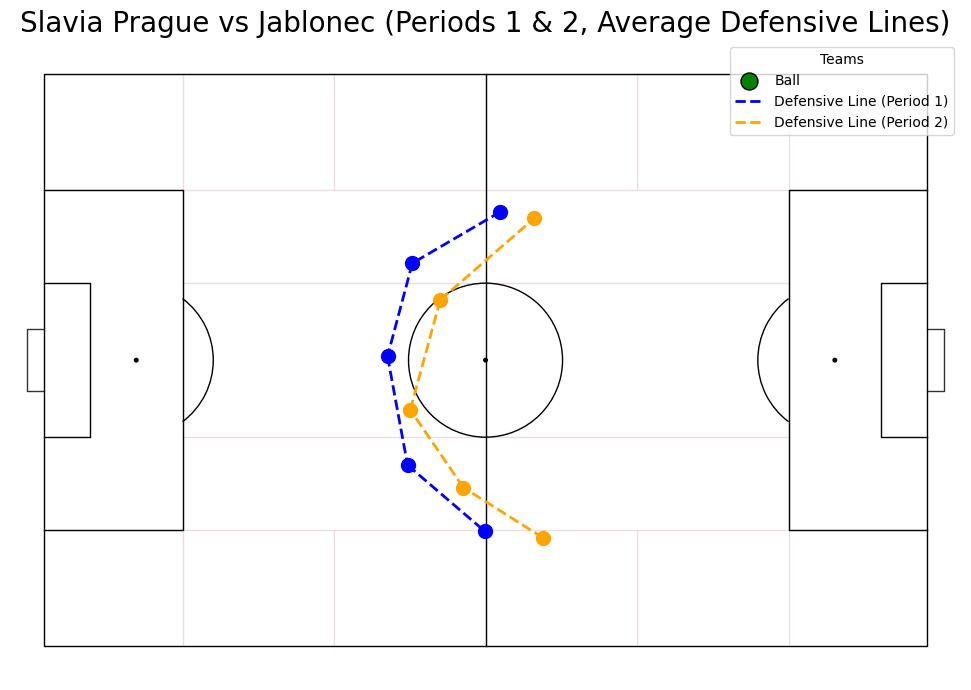

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import json
import ast  # For safely evaluating strings as Python literals
import math  # For calculating Euclidean distance

# Load the first DataFrame (replace with your actual file path)
df_tracking = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_tracking_extrapolated_expanded.xlsx")

# Load the second Excel file with team information (replace with your actual file path)
df_teams = pd.read_excel("/Users/marclambertes/Downloads/Wyscout/2007796_match_expanded.xlsx")

# Print column names of the second DataFrame to verify the correct column name
print("Columns in the second Excel file:")
print(df_teams.columns)

# Extract team information from the 'home_team' and 'away_team' columns in the second DataFrame
player_to_team = {}  # Dictionary to map player_id to team_id
player_to_acronym = {}  # Dictionary to map player_id to acronym
team_players = {}  # Dictionary to store players grouped by team_id
team_names = {}  # Dictionary to map team_id to team short_name

# Extract home_team and away_team information
home_team_data = df_teams['home_team'].iloc[0]  # Home team data (string)
away_team_data = df_teams['away_team'].iloc[0]  # Away team data (string)

# Parse home_team and away_team strings into dictionaries
try:
    home_team_data = json.loads(home_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    home_team_data = ast.literal_eval(home_team_data)  # Fallback to ast.literal_eval

try:
    away_team_data = json.loads(away_team_data)  # Try parsing as JSON
except json.JSONDecodeError:
    away_team_data = ast.literal_eval(away_team_data)  # Fallback to ast.literal_eval

# Extract team IDs and short names
home_team_id = home_team_data['id']  # Home team ID
away_team_id = away_team_data['id']  # Away team ID
home_team_name = home_team_data['short_name']  # Home team short name
away_team_name = away_team_data['short_name']  # Away team short name

# Map team IDs to their short names
team_names[home_team_id] = home_team_name
team_names[away_team_id] = away_team_name

# Process the 'players' column to map players to their respective teams and acronyms
for index, row in df_teams.iterrows():
    players = row['players']  # Access the 'players' column
    
    if isinstance(players, str):  # If the data is stored as a string
        try:
            players = json.loads(players)  # Parse JSON string
        except json.JSONDecodeError:
            try:
                players = ast.literal_eval(players)  # Parse Python literal
            except (ValueError, SyntaxError) as e:
                print(f"Failed to parse players data at row {index}: {e}")
                continue
    
    if isinstance(players, list):  # Ensure it's a list of dictionaries
        for player in players:
            player_id = player['id']
            short_name = player['short_name']
            number = player['number']
            team_id = player['team_id']  # Get the team_id for the player
            acronym = player['player_role']['acronym']  # Get the acronym from player_role
            
            # Map player_id to team_id
            player_to_team[player_id] = team_id
            
            # Map player_id to acronym
            player_to_acronym[player_id] = acronym
            
            # Add player to the team_players dictionary
            if team_id not in team_players:
                team_players[team_id] = []
            team_players[team_id].append(f"{number}. {short_name} ({acronym})")  # Format: "Number. Short Name (Acronym)"

# Function to calculate average positions for a given period
def calculate_average_positions(period_data, home_team_id, player_to_acronym):
    home_team_defenders = {
        'LWB': {'x': [], 'y': []},
        'LCB': {'x': [], 'y': []},
        'CB': {'x': [], 'y': []},
        'RCB': {'x': [], 'y': []},
        'RWB': {'x': [], 'y': []}
    }
    
    for frame in period_data["frame"].unique():
        frame_data = period_data[period_data["frame"] == frame]
        
        # Extract and parse player_data
        player_data_str = frame_data["player_data"].iloc[0]
        
        if isinstance(player_data_str, str):
            try:
                player_data = json.loads(player_data_str)
            except json.JSONDecodeError:
                try:
                    player_data = ast.literal_eval(player_data_str)
                except (ValueError, SyntaxError) as e:
                    print(f"Failed to parse player_data for frame {frame}: {e}")
                    continue
        else:
            player_data = player_data_str
        
        # Extract player positions, IDs, and team IDs
        player_x = [player['x'] for player in player_data]
        player_y = [player['y'] for player in player_data]
        player_ids = [player['player_id'] for player in player_data]
        player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
        player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]
        
        # Collect positions for LWB, LCB, CB, RCB, and RWB of the home_team
        for x, y, team_id, acronym in zip(player_x, player_y, player_teams, player_acronyms):
            if team_id == home_team_id and acronym in home_team_defenders:
                home_team_defenders[acronym]['x'].append(x)
                home_team_defenders[acronym]['y'].append(y)
    
    # Calculate average positions
    average_positions = {}
    for acronym, positions in home_team_defenders.items():
        if positions['x']:  # Check if there are positions for this acronym
            avg_x = sum(positions['x']) / len(positions['x'])
            avg_y = sum(positions['y']) / len(positions['y'])
            average_positions[acronym] = (avg_x, avg_y)
    
    return average_positions

# Function to flip coordinates to ensure both periods face the same side
def flip_coordinates(average_positions, pitch_length=105):
    flipped_positions = {}
    for acronym, (x, y) in average_positions.items():
        # Flip x-coordinate relative to the center (0, 0)
        flipped_x = -x  # Subtract from 0 to flip
        flipped_positions[acronym] = (flipped_x, y)  # Keep y-coordinate the same
    return flipped_positions

# Function to calculate defensive line compactness
def calculate_defensive_compactness(average_positions):
    """
    Calculate the defensive line compactness metric based on average positions.
    :param average_positions: Dictionary of average positions for LWB, LCB, CB, RCB, RWB.
    :return: Average distance between adjacent defenders.
    """
    # Define the order of defenders in the defensive line
    defenders_order = ['LWB', 'LCB', 'CB', 'RCB', 'RWB']
    
    # Calculate pairwise distances between adjacent defenders
    total_distance = 0
    num_pairs = 0
    
    for i in range(len(defenders_order) - 1):
        defender1 = defenders_order[i]
        defender2 = defenders_order[i + 1]
        
        if defender1 in average_positions and defender2 in average_positions:
            x1, y1 = average_positions[defender1]
            x2, y2 = average_positions[defender2]
            
            # Calculate Euclidean distance between the two defenders
            distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_distance += distance
            num_pairs += 1
    
    # Calculate the average distance
    if num_pairs > 0:
        return total_distance / num_pairs
    else:
        return None

# Filter the first DataFrame for period == 1 and period == 2
period1_data = df_tracking[df_tracking["period"] == 1]
period2_data = df_tracking[df_tracking["period"] == 2]

# Calculate average positions for period == 1 and period == 2
average_positions_period1 = calculate_average_positions(period1_data, home_team_id, player_to_acronym)
average_positions_period2 = calculate_average_positions(period2_data, home_team_id, player_to_acronym)

# Flip coordinates for period == 2 to ensure both periods face the same side
average_positions_period2 = flip_coordinates(average_positions_period2)

# Calculate defensive compactness for each period
compactness_period1 = calculate_defensive_compactness(average_positions_period1)
compactness_period2 = calculate_defensive_compactness(average_positions_period2)

# Print the results
print(f"Defensive Line Compactness - Period 1: {compactness_period1:.2f} meters")
print(f"Defensive Line Compactness - Period 2: {compactness_period2:.2f} meters")

# Compare the two periods
if compactness_period1 and compactness_period2:
    if compactness_period1 < compactness_period2:
        print("The defensive line was more compact in Period 1.")
    elif compactness_period1 > compactness_period2:
        print("The defensive line was more compact in Period 2.")
    else:
        print("The defensive line compactness was the same in both periods.")
else:
    print("Could not calculate compactness for one or both periods.")

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions for the last frame in period == 2 (for visualization)
last_frame_data = period2_data[period2_data["frame"] == period2_data["frame"].max()]
player_data_str = last_frame_data["player_data"].iloc[0]

if isinstance(player_data_str, str):
    try:
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    player_data = player_data_str

player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

for i, (x, y, player_id, team_id, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_acronyms)):
    color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
    ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
    ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Display acronym outside the dot

# Plot ball position for the last frame
ball_x = last_frame_data["ball_data.x"].iloc[0]
ball_y = last_frame_data["ball_data.y"].iloc[0]
ball_is_detected = last_frame_data["ball_data.is_detected"].iloc[0]

if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Draw lines and nodes for period == 1
if len(average_positions_period1) == 5:  # Ensure all five acronyms are present
    lwb_x, lwb_y = average_positions_period1['LWB']
    lcb_x, lcb_y = average_positions_period1['LCB']
    cb_x, cb_y = average_positions_period1['CB']
    rcb_x, rcb_y = average_positions_period1['RCB']
    rwb_x, rwb_y = average_positions_period1['RWB']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='blue', linestyle='--', linewidth=2, label='Defensive Line (Period 1)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='blue', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x], [lwb_y, lcb_y, cb_y, rcb_y, rwb_y], color='blue', s=100, marker='o')

# Draw lines and nodes for period == 2
if len(average_positions_period2) == 5:  # Ensure all five acronyms are present
    lwb_x, lwb_y = average_positions_period2['LWB']
    lcb_x, lcb_y = average_positions_period2['LCB']
    cb_x, cb_y = average_positions_period2['CB']
    rcb_x, rcb_y = average_positions_period2['RCB']
    rwb_x, rwb_y = average_positions_period2['RWB']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='orange', linestyle='--', linewidth=2, label='Defensive Line (Period 2)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='orange', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x], [lwb_y, lcb_y, cb_y, rcb_y, rwb_y], color='orange', s=100, marker='o')

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Periods 1 & 2, Average Defensive Lines)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()

Defensive Line Compactness - Period 1: 12.20 meters
Defensive Line Compactness - Period 2: 12.67 meters
The defensive line was more compact in Period 1.


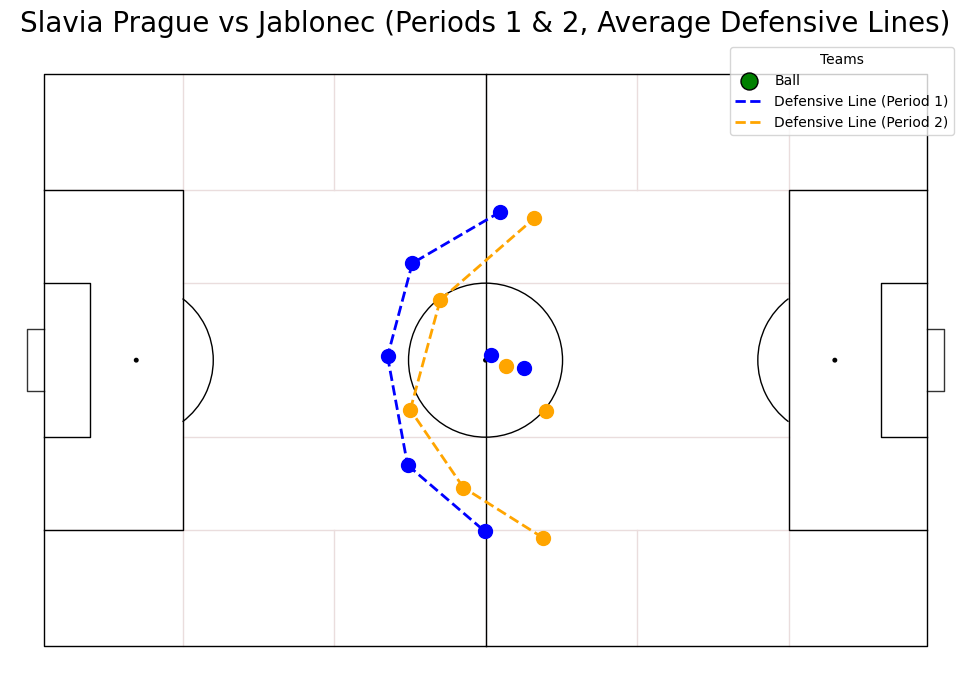

In [60]:
# Function to calculate average positions for a given period (including LM and RM)
def calculate_average_positions(period_data, home_team_id, player_to_acronym):
    home_team_defenders = {
        'LWB': {'x': [], 'y': []},
        'LCB': {'x': [], 'y': []},
        'CB': {'x': [], 'y': []},
        'RCB': {'x': [], 'y': []},
        'RWB': {'x': [], 'y': []},
        'LM': {'x': [], 'y': []},  # Left Midfielder
        'RM': {'x': [], 'y': []}   # Right Midfielder
    }
    
    for frame in period_data["frame"].unique():
        frame_data = period_data[period_data["frame"] == frame]
        
        # Extract and parse player_data
        player_data_str = frame_data["player_data"].iloc[0]
        
        if isinstance(player_data_str, str):
            try:
                player_data = json.loads(player_data_str)
            except json.JSONDecodeError:
                try:
                    player_data = ast.literal_eval(player_data_str)
                except (ValueError, SyntaxError) as e:
                    print(f"Failed to parse player_data for frame {frame}: {e}")
                    continue
        else:
            player_data = player_data_str
        
        # Extract player positions, IDs, and team IDs
        player_x = [player['x'] for player in player_data]
        player_y = [player['y'] for player in player_data]
        player_ids = [player['player_id'] for player in player_data]
        player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
        player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]
        
        # Collect positions for LWB, LCB, CB, RCB, RWB, LM, and RM of the home_team
        for x, y, team_id, acronym in zip(player_x, player_y, player_teams, player_acronyms):
            if team_id == home_team_id and acronym in home_team_defenders:
                home_team_defenders[acronym]['x'].append(x)
                home_team_defenders[acronym]['y'].append(y)
    
    # Calculate average positions
    average_positions = {}
    for acronym, positions in home_team_defenders.items():
        if positions['x']:  # Check if there are positions for this acronym
            avg_x = sum(positions['x']) / len(positions['x'])
            avg_y = sum(positions['y']) / len(positions['y'])
            average_positions[acronym] = (avg_x, avg_y)
    
    return average_positions

# Function to flip coordinates to ensure both periods face the same side
def flip_coordinates(average_positions, pitch_length=105):
    flipped_positions = {}
    for acronym, (x, y) in average_positions.items():
        # Flip x-coordinate relative to the center (0, 0)
        flipped_x = -x  # Subtract from 0 to flip
        flipped_positions[acronym] = (flipped_x, y)  # Keep y-coordinate the same
    return flipped_positions

# Function to calculate defensive line compactness (including LM and RM)
def calculate_defensive_compactness(average_positions):
    """
    Calculate the defensive line compactness metric based on average positions.
    :param average_positions: Dictionary of average positions for LWB, LCB, CB, RCB, RWB, LM, RM.
    :return: Average distance between adjacent defenders.
    """
    # Define the order of defenders in the defensive line
    defenders_order = ['LWB', 'LCB', 'CB', 'RCB', 'RWB']
    
    # Calculate pairwise distances between adjacent defenders
    total_distance = 0
    num_pairs = 0
    
    for i in range(len(defenders_order) - 1):
        defender1 = defenders_order[i]
        defender2 = defenders_order[i + 1]
        
        if defender1 in average_positions and defender2 in average_positions:
            x1, y1 = average_positions[defender1]
            x2, y2 = average_positions[defender2]
            
            # Calculate Euclidean distance between the two defenders
            distance = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
            total_distance += distance
            num_pairs += 1
    
    # Calculate the average distance
    if num_pairs > 0:
        return total_distance / num_pairs
    else:
        return None

# Filter the first DataFrame for period == 1 and period == 2
period1_data = df_tracking[df_tracking["period"] == 1]
period2_data = df_tracking[df_tracking["period"] == 2]

# Calculate average positions for period == 1 and period == 2
average_positions_period1 = calculate_average_positions(period1_data, home_team_id, player_to_acronym)
average_positions_period2 = calculate_average_positions(period2_data, home_team_id, player_to_acronym)

# Flip coordinates for period == 2 to ensure both periods face the same side
average_positions_period2 = flip_coordinates(average_positions_period2)

# Calculate defensive compactness for each period
compactness_period1 = calculate_defensive_compactness(average_positions_period1)
compactness_period2 = calculate_defensive_compactness(average_positions_period2)

# Print the results
print(f"Defensive Line Compactness - Period 1: {compactness_period1:.2f} meters")
print(f"Defensive Line Compactness - Period 2: {compactness_period2:.2f} meters")

# Compare the two periods
if compactness_period1 and compactness_period2:
    if compactness_period1 < compactness_period2:
        print("The defensive line was more compact in Period 1.")
    elif compactness_period1 > compactness_period2:
        print("The defensive line was more compact in Period 2.")
    else:
        print("The defensive line compactness was the same in both periods.")
else:
    print("Could not calculate compactness for one or both periods.")

# Set up the pitch
pitch = Pitch(positional=True, pitch_type='skillcorner', pitch_color='white', line_color='black',
              linewidth=1, half=False, goal_type='box', goal_alpha=0.8,
              pitch_length=105, pitch_width=68)  # Set pitch dimensions

# Create figure
fig, ax = pitch.draw(figsize=(12, 7))  # Increase figure width to accommodate player list

# Define colors for home_team and away_team
team_colors = {
    home_team_id: 'blue',  # Home team color
    away_team_id: 'red'    # Away team color
}

# Plot player positions for the last frame in period == 2 (for visualization)
last_frame_data = period2_data[period2_data["frame"] == period2_data["frame"].max()]
player_data_str = last_frame_data["player_data"].iloc[0]

if isinstance(player_data_str, str):
    try:
        player_data = json.loads(player_data_str)
    except json.JSONDecodeError:
        try:
            player_data = ast.literal_eval(player_data_str)
        except (ValueError, SyntaxError) as e:
            raise ValueError(f"Failed to parse player_data: {e}")
else:
    player_data = player_data_str

player_x = [player['x'] for player in player_data]
player_y = [player['y'] for player in player_data]
player_ids = [player['player_id'] for player in player_data]
player_teams = [player_to_team.get(player_id, None) for player_id in player_ids]
player_acronyms = [player_to_acronym.get(player_id, "Unknown") for player_id in player_ids]

for i, (x, y, player_id, team_id, acronym) in enumerate(zip(player_x, player_y, player_ids, player_teams, player_acronyms)):
    color = team_colors.get(team_id, 'gray')  # Default to gray if team ID is not in team_colors
    ax.scatter(x, y, color=color, s=250, label=f'{team_names.get(team_id, "Unknown Team")}' if i == 0 else "")  # s = size of markers
    ax.text(x, y + 2, acronym, fontsize=8, ha='center', va='bottom', color='black')  # Display acronym outside the dot

# Plot ball position for the last frame
ball_x = last_frame_data["ball_data.x"].iloc[0]
ball_y = last_frame_data["ball_data.y"].iloc[0]
ball_is_detected = last_frame_data["ball_data.is_detected"].iloc[0]

if ball_is_detected:  # Only plot the ball if it is detected
    ax.scatter(ball_x, ball_y, color='green', s=150, label='Ball', marker='o', edgecolors='black')  # s = size of marker

# Draw lines and nodes for period == 1
if len(average_positions_period1) == 7:  # Ensure all seven acronyms are present
    lwb_x, lwb_y = average_positions_period1['LWB']
    lcb_x, lcb_y = average_positions_period1['LCB']
    cb_x, cb_y = average_positions_period1['CB']
    rcb_x, rcb_y = average_positions_period1['RCB']
    rwb_x, rwb_y = average_positions_period1['RWB']
    lm_x, lm_y = average_positions_period1['LM']
    rm_x, rm_y = average_positions_period1['RM']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='blue', linestyle='--', linewidth=2, label='Defensive Line (Period 1)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='blue', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='blue', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x, lm_x, rm_x], 
               [lwb_y, lcb_y, cb_y, rcb_y, rwb_y, lm_y, rm_y], 
               color='blue', s=100, marker='o')

# Draw lines and nodes for period == 2
if len(average_positions_period2) == 7:  # Ensure all seven acronyms are present
    lwb_x, lwb_y = average_positions_period2['LWB']
    lcb_x, lcb_y = average_positions_period2['LCB']
    cb_x, cb_y = average_positions_period2['CB']
    rcb_x, rcb_y = average_positions_period2['RCB']
    rwb_x, rwb_y = average_positions_period2['RWB']
    lm_x, lm_y = average_positions_period2['LM']
    rm_x, rm_y = average_positions_period2['RM']
    
    # Draw lines
    ax.plot([lwb_x, lcb_x], [lwb_y, lcb_y], color='orange', linestyle='--', linewidth=2, label='Defensive Line (Period 2)')
    ax.plot([lcb_x, cb_x], [lcb_y, cb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([cb_x, rcb_x], [cb_y, rcb_y], color='orange', linestyle='--', linewidth=2)
    ax.plot([rcb_x, rwb_x], [rcb_y, rwb_y], color='orange', linestyle='--', linewidth=2)
    
    # Add nodes
    ax.scatter([lwb_x, lcb_x, cb_x, rcb_x, rwb_x, lm_x, rm_x], 
               [lwb_y, lcb_y, cb_y, rcb_y, rwb_y, lm_y, rm_y], 
               color='orange', s=100, marker='o')

# Add title
plt.title(f"{home_team_name} vs {away_team_name} (Periods 1 & 2, Average Defensive Lines)", fontsize=20)

# Add legend for teams
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right', title="Teams")

# Show the plot
plt.show()